In [1]:
# set directory to src for imports
import os
os.chdir("../src")

In [2]:
from typing import List
from matplotlib import pyplot as plt
import torch

from agents.Agent import Agent

from Costs import CostFunction, PorportionalCost
from agents.RecurrentAgent import RecurrentAgent
from agents.SimpleAgent import SimpleAgent
from instruments.Claims import Claim
from instruments.Derivatives import EuropeanCall, BSCall
from instruments.Instruments import Instrument
from instruments.Primaries import GeometricBrownianStock
import RiskMeasures
from ExperimentRunner import ExperimentRunner




In [3]:
T = 50
total_rate = 0.0
step_interest_rate = (total_rate + 1) ** (1 / T) - 1
drift = step_interest_rate
volatility = 0.2
S0 = 10
stock = GeometricBrownianStock(S0, drift, volatility)


contingent_claim: Claim = BSCall(stock, S0, T, drift, volatility)
hedging_instruments: List[Instrument] = [stock]
epochs = 50
paths = int(1e5)
verbose = False
criterion: torch.nn.Module = RiskMeasures.TailValue(.05)
cost_function: CostFunction = PorportionalCost(0.00)



In [4]:
runner = ExperimentRunner("recurrent", pref_gpu=True)
res = runner.run(contingent_claim, hedging_instruments, criterion, T, step_interest_rate, epochs, paths, verbose, cost_function)

res

Running on MPS GPU


Training:   0%|          | 0/50 [00:00<?, ?it/s]/Users/albin/sdk/miniforge3/envs/py39/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Training: 100%|██████████| 50/50 [00:48<00:00,  1.02it/s]


-17.77750587463379

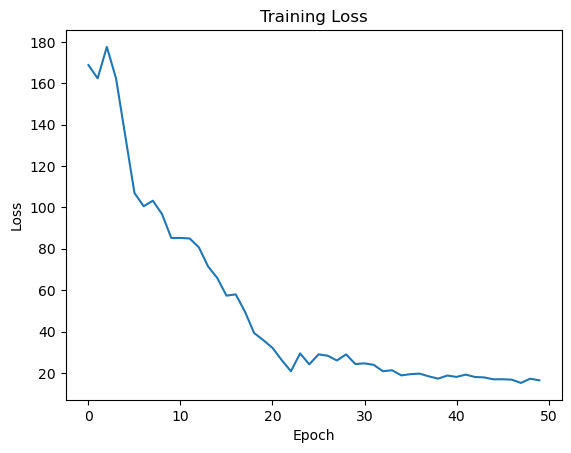

In [5]:
runner.plot_training_loss()
plt.show()

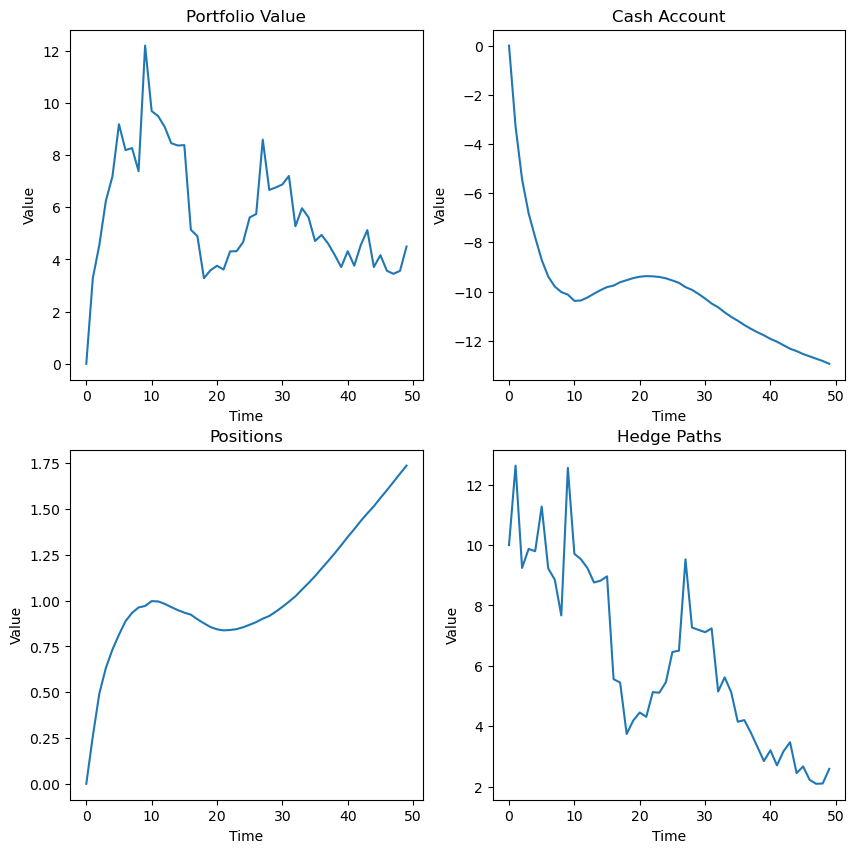

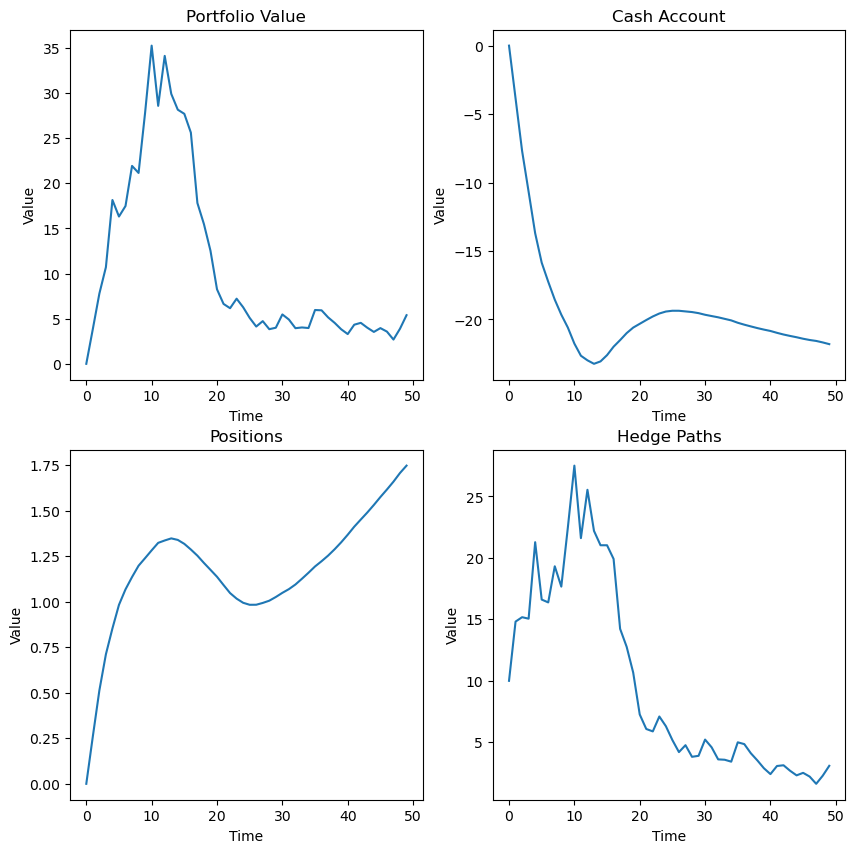

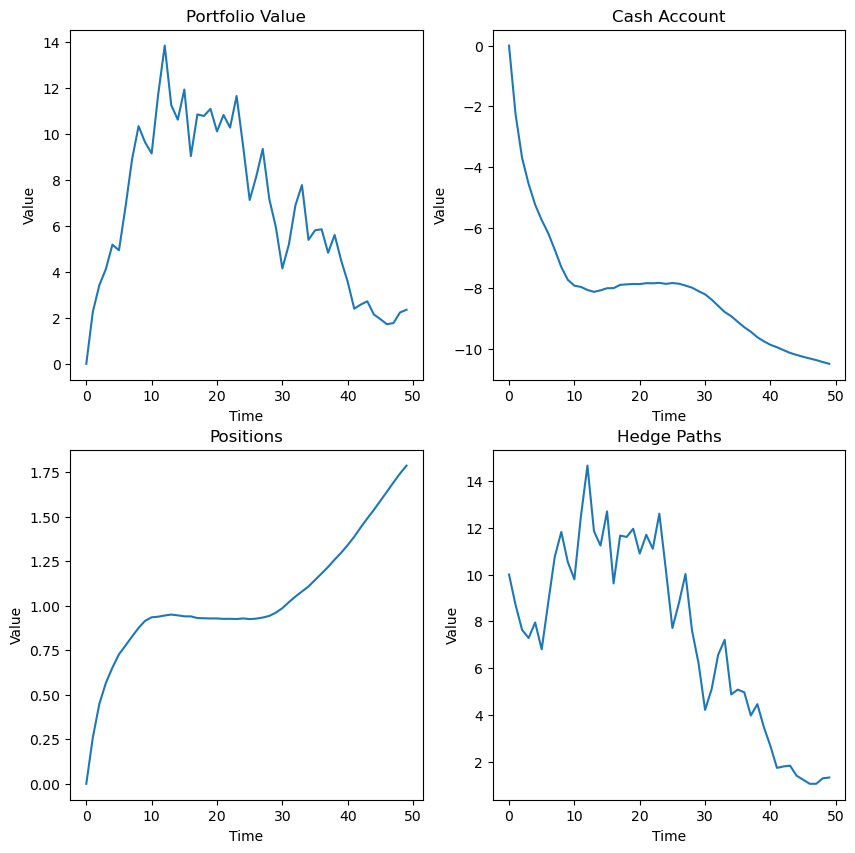

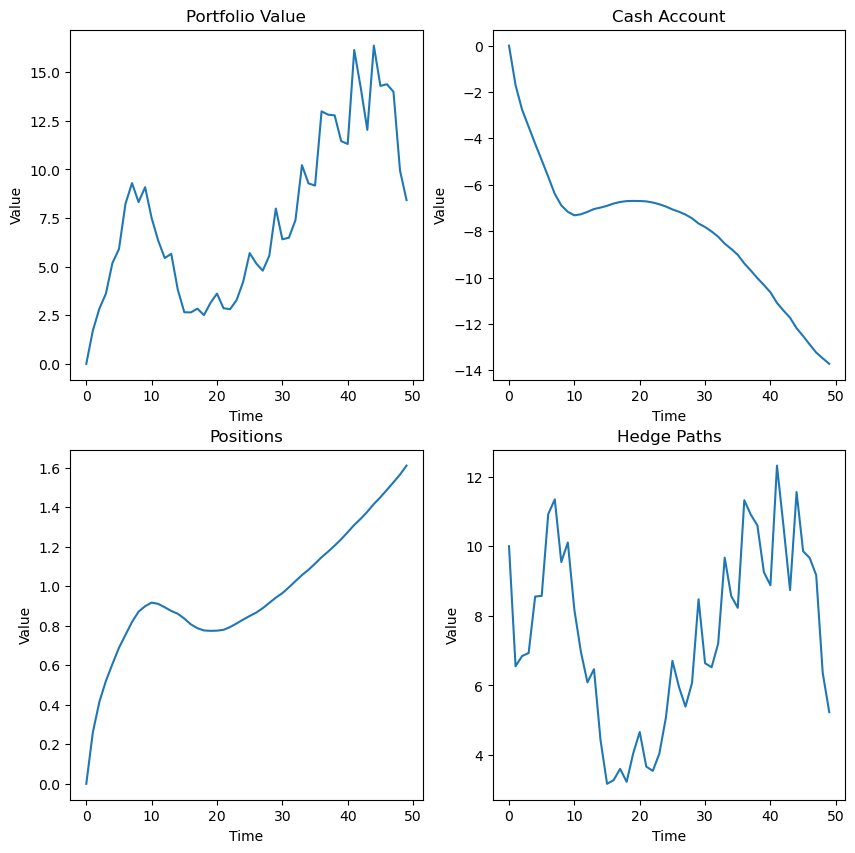

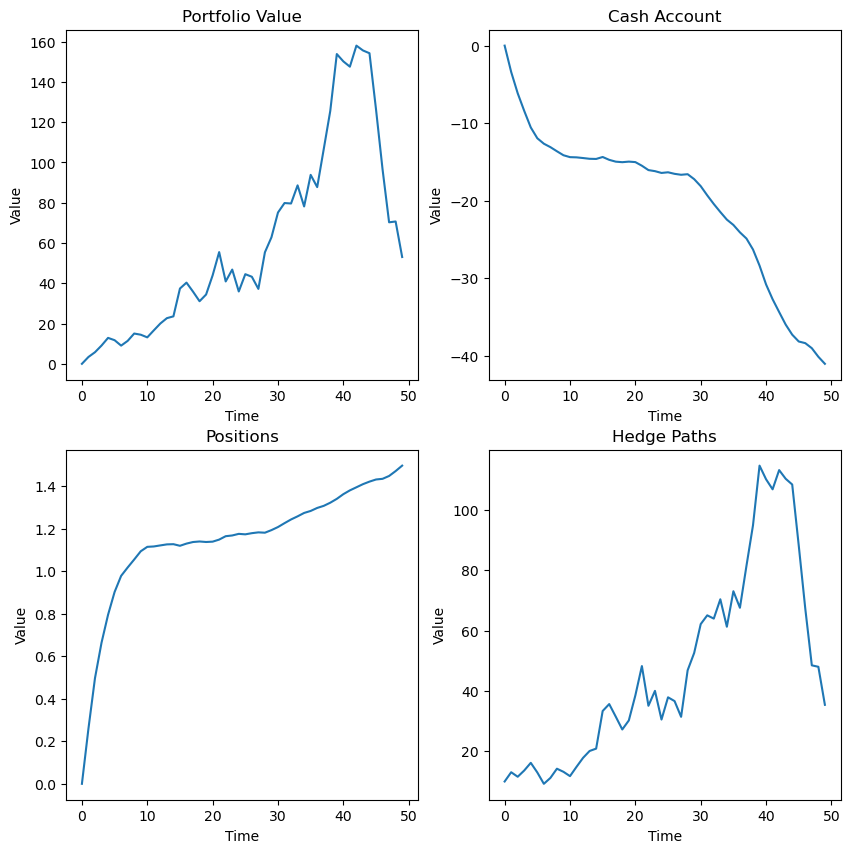

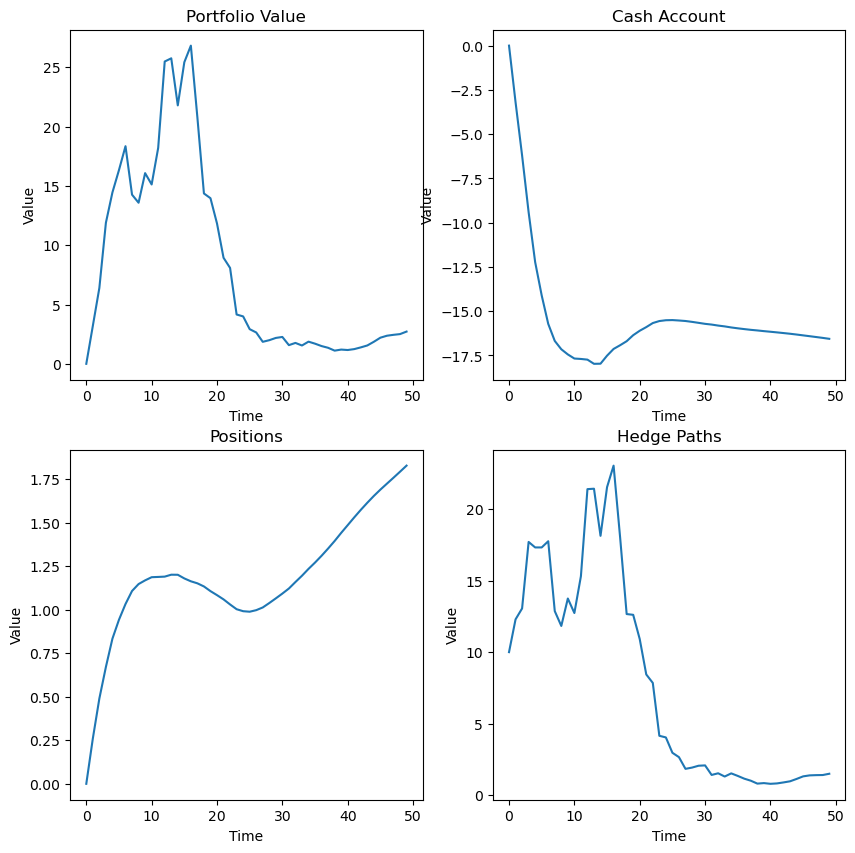

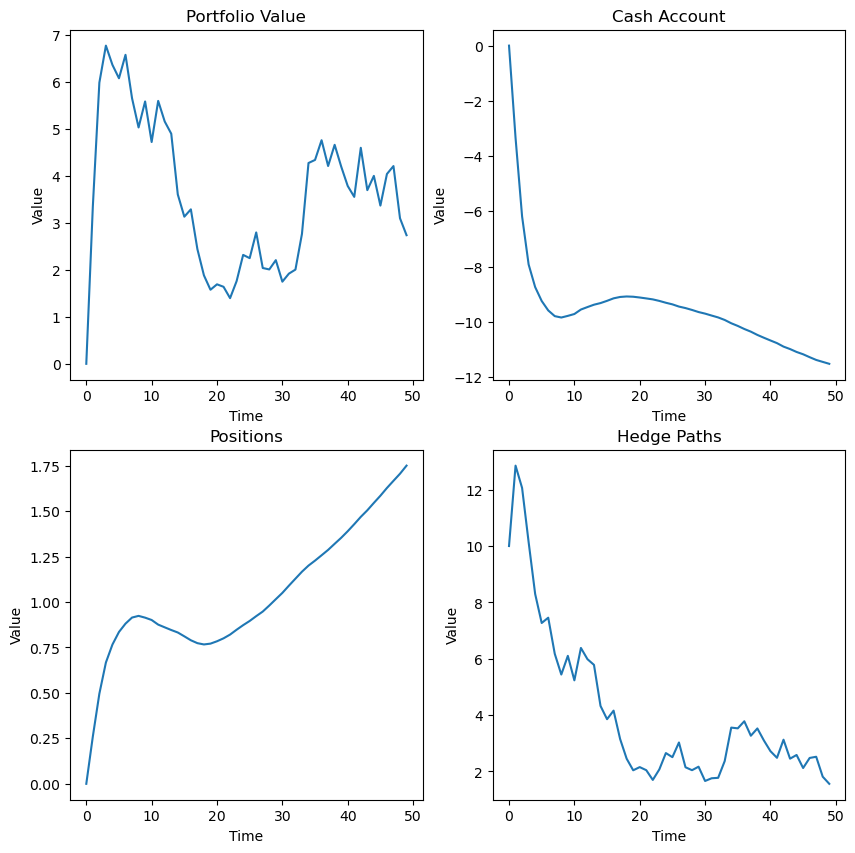

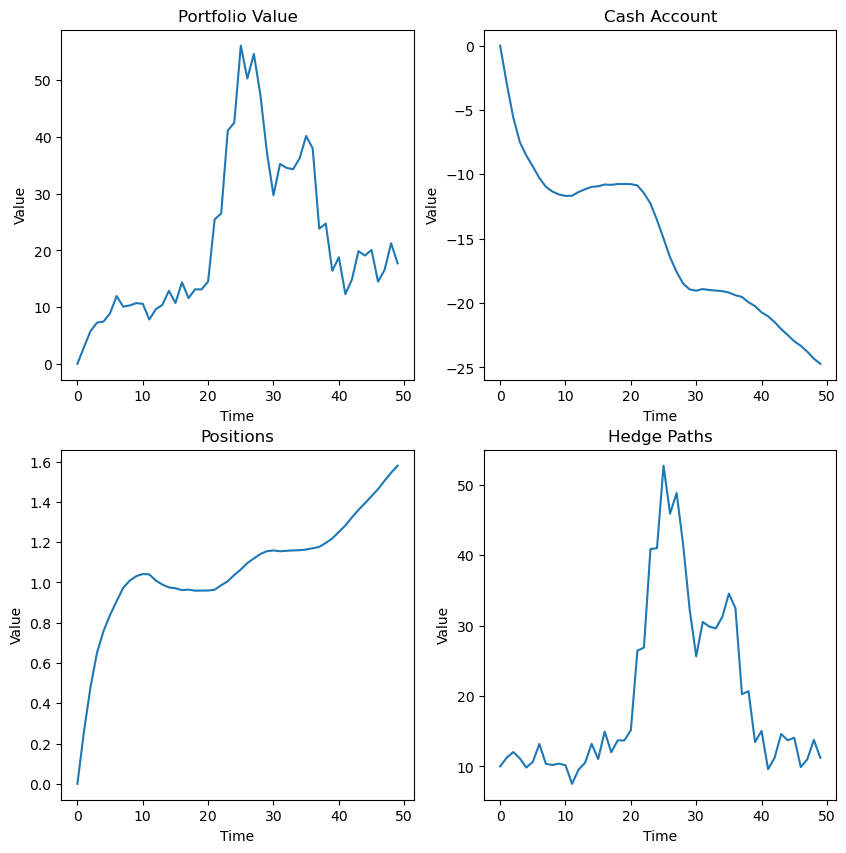

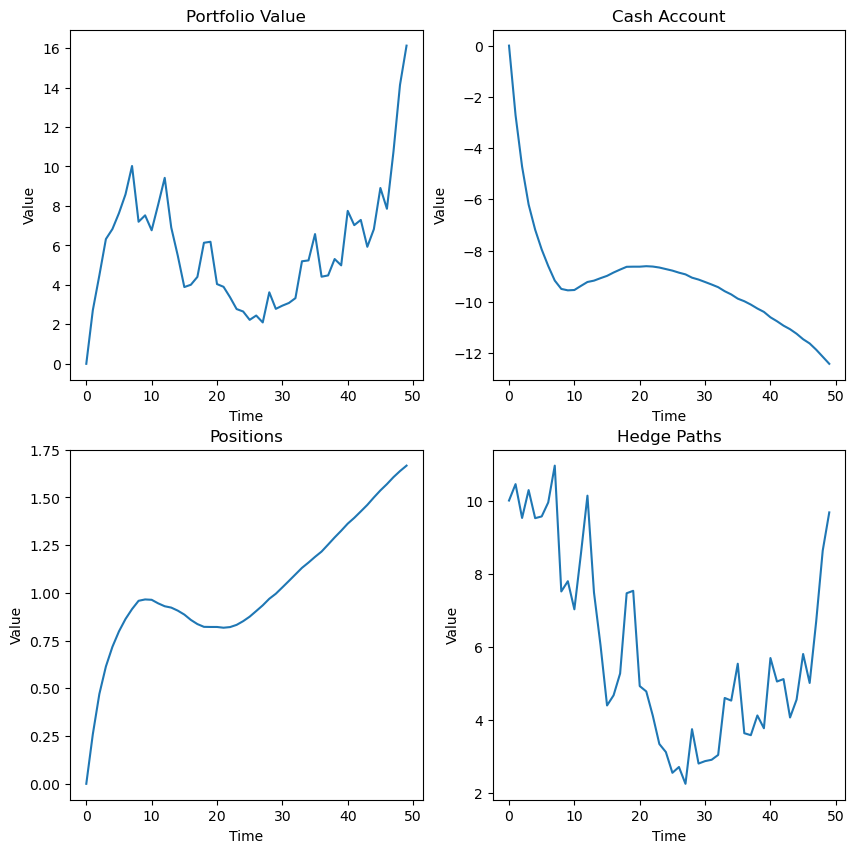

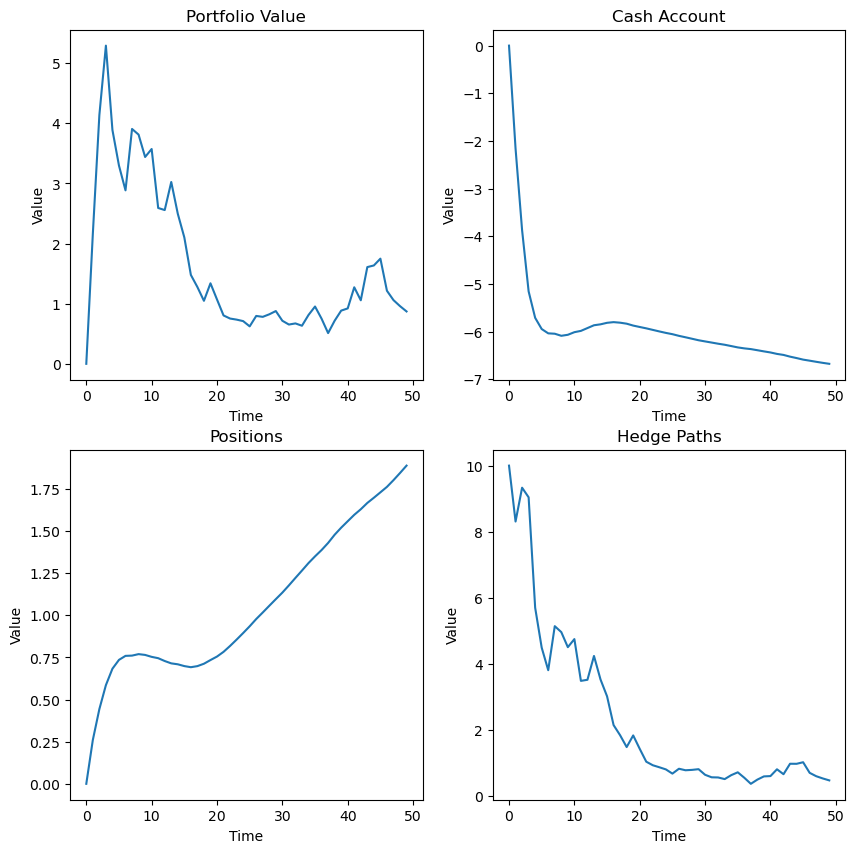

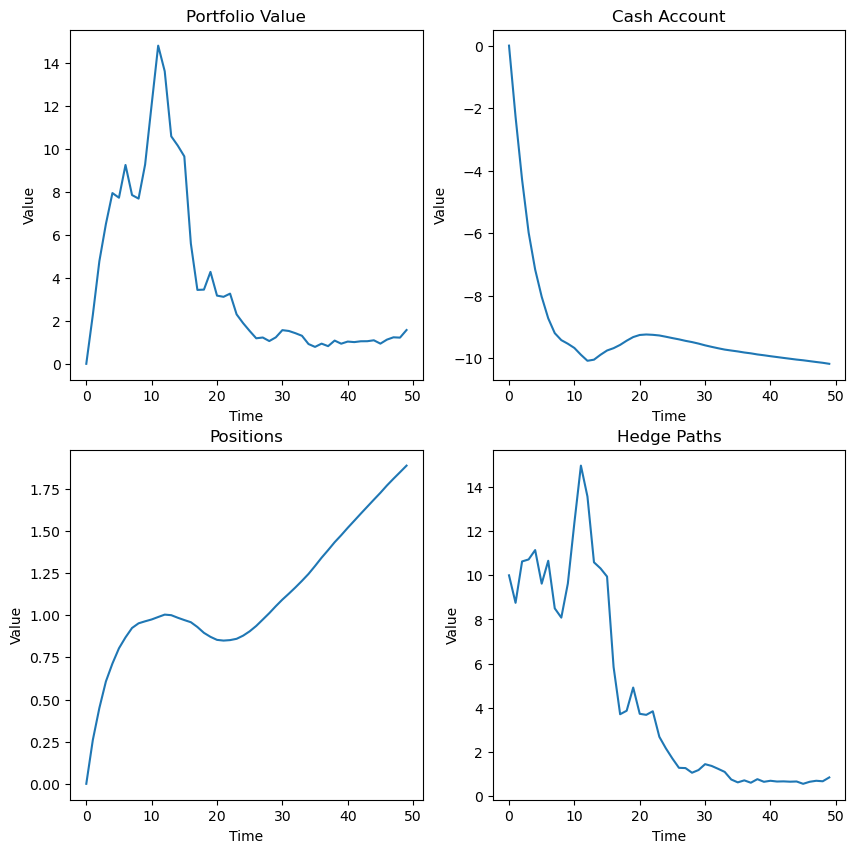

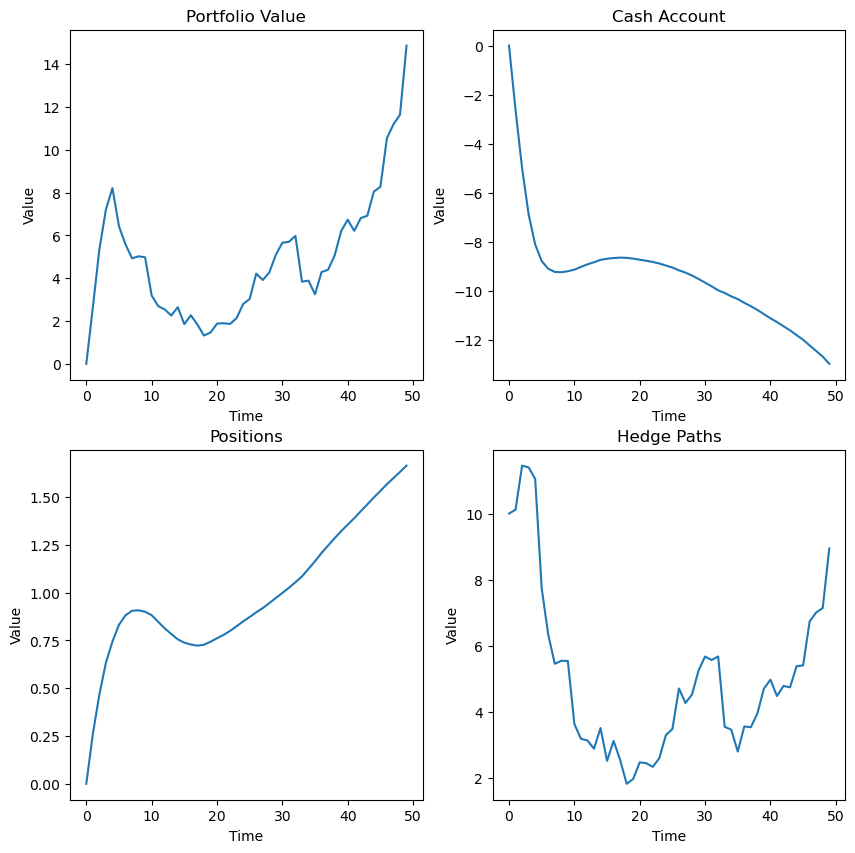

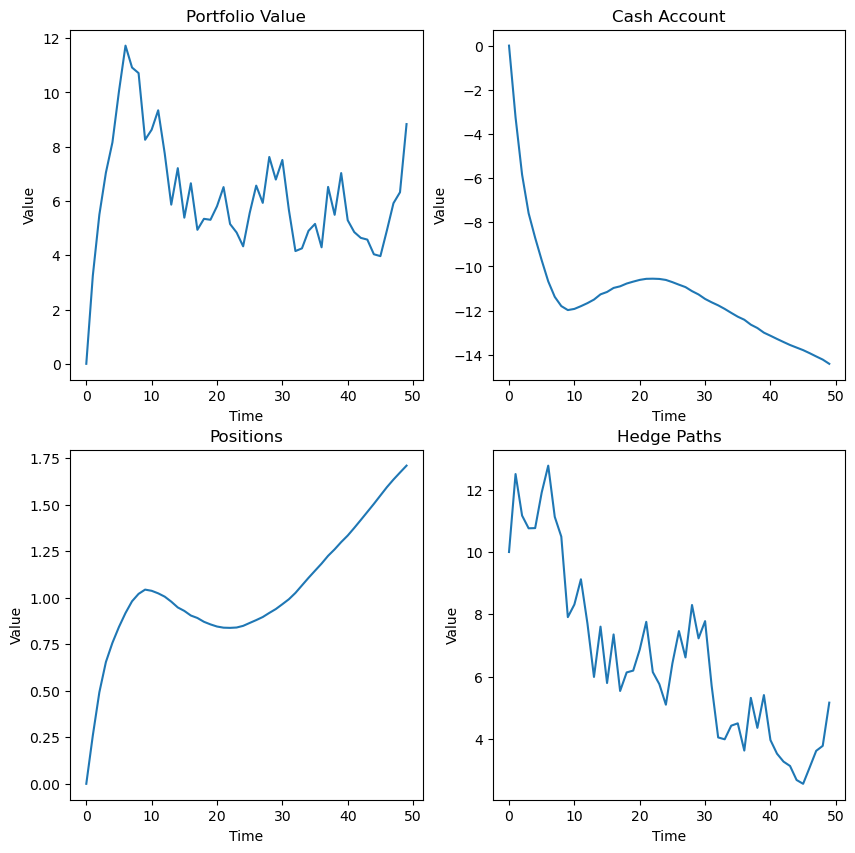

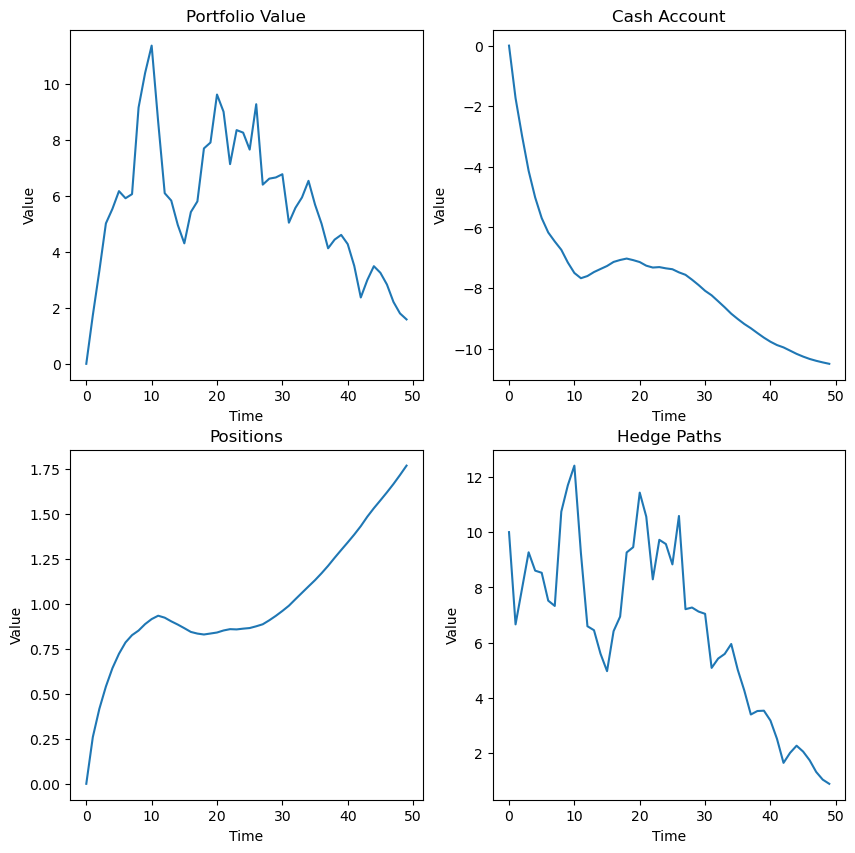

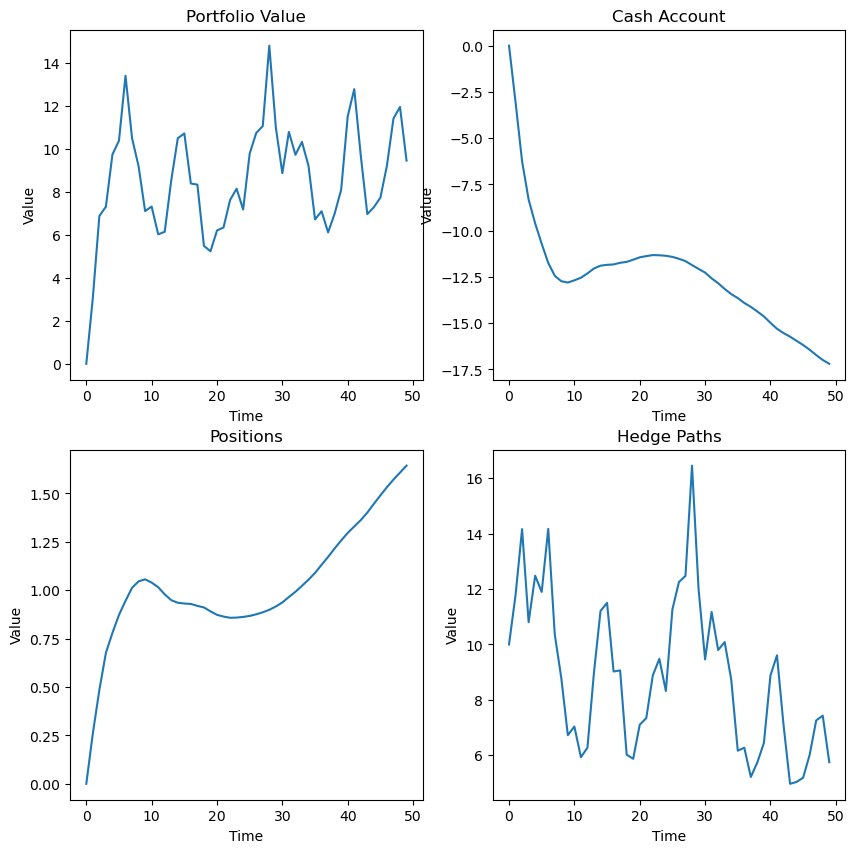

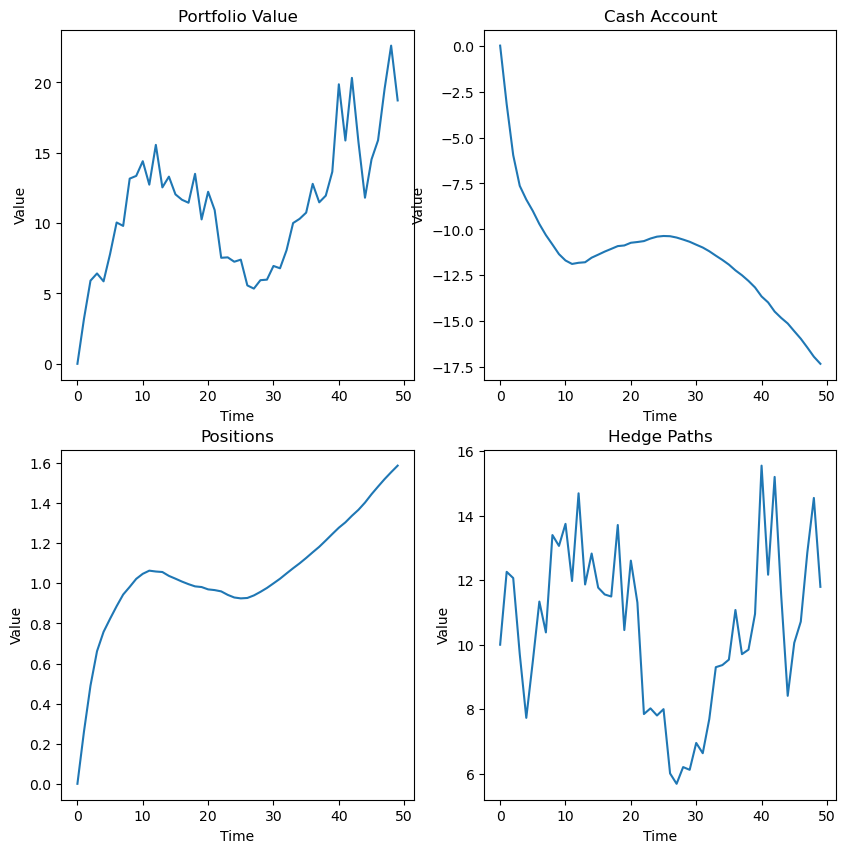

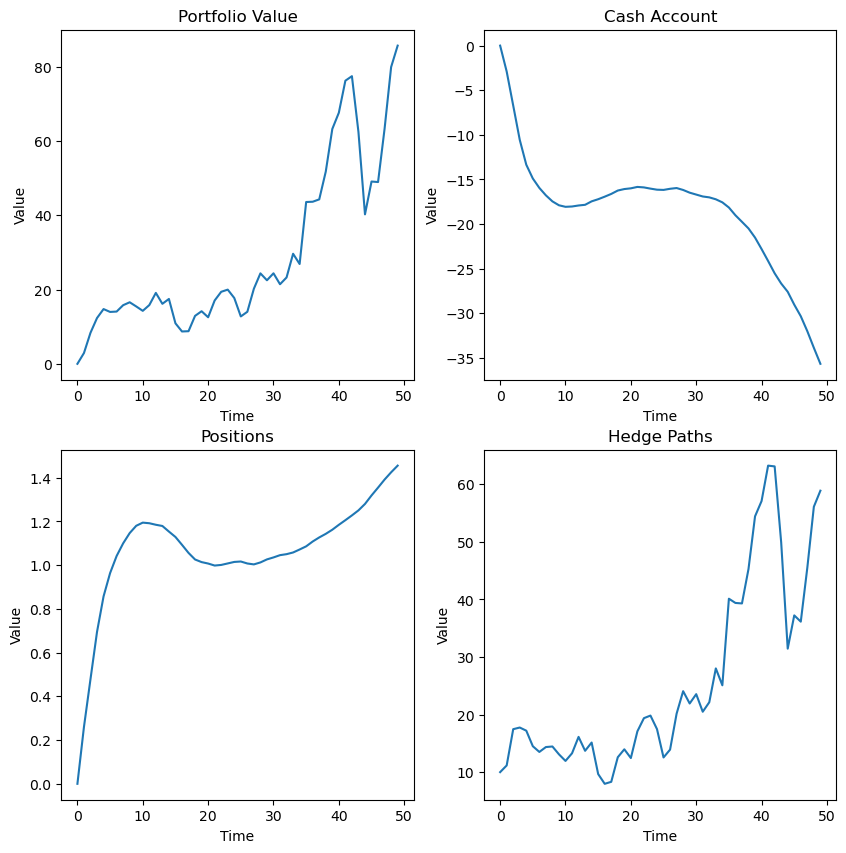

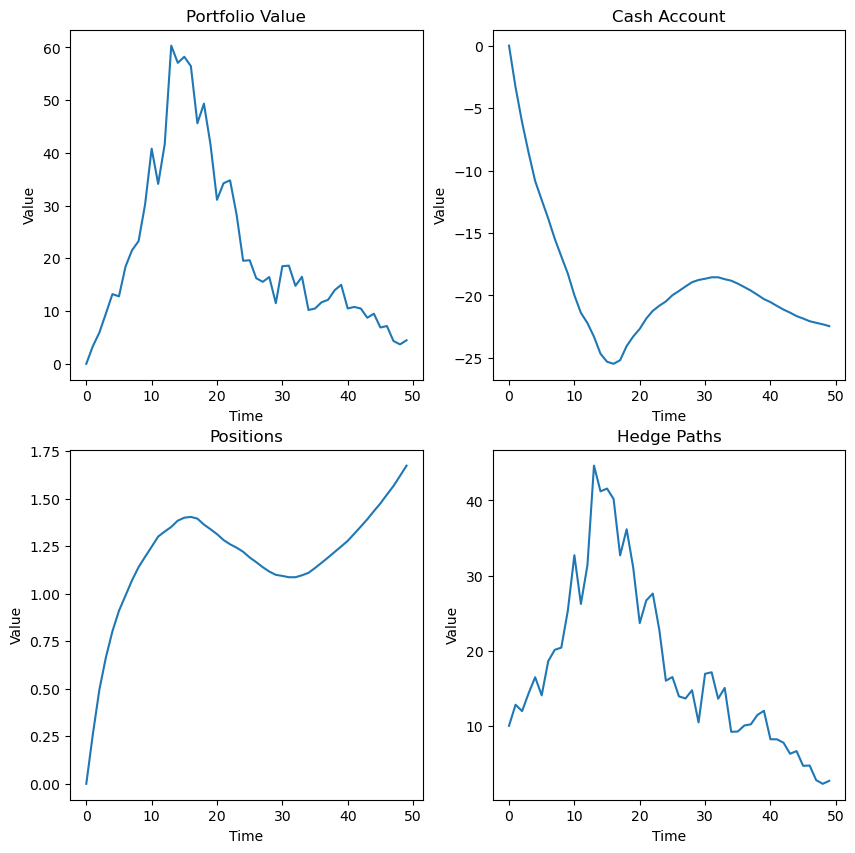

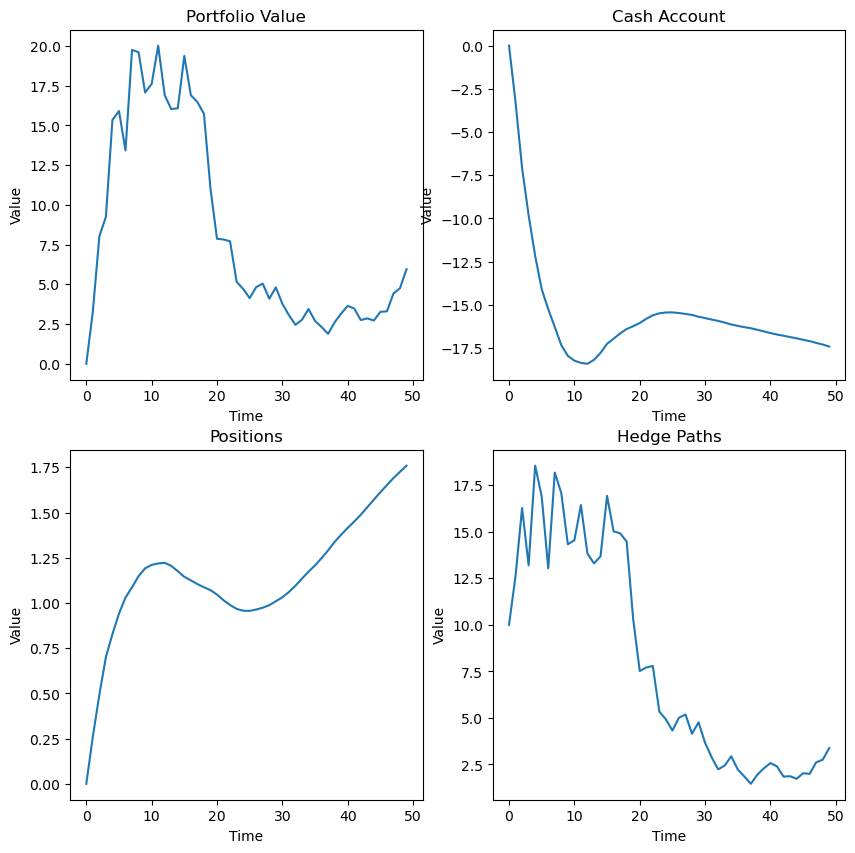

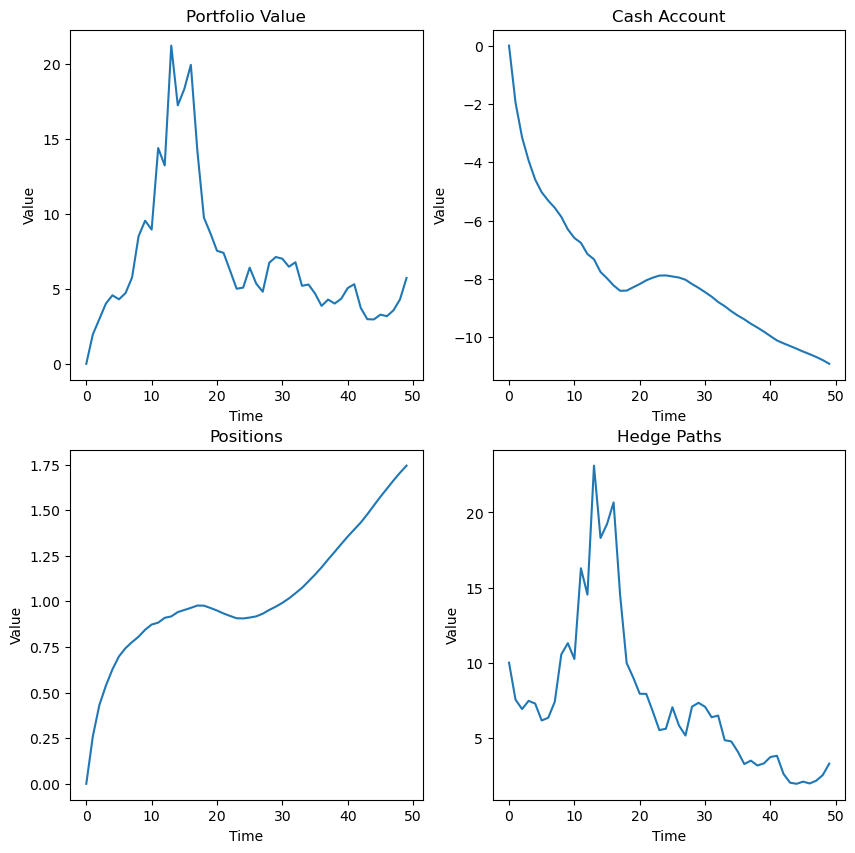

In [6]:

for i in range(20):
    runner.plot_path(i)
    plt.show()